# Fuel Blend Properties Prediction Challenge

The challenge is to develop a model that accurately predicts the final properties of fuel blends based on the proportions and characteristics of their constituent components. This task is crucial for accelerating the adoption of Sustainable Aviation Fuels (SAFs) by enabling the rapid evaluation of thousands of potential blend combinations, identifying optimal and sustainable recipes, and reducing development time.

The dataset is divided into:
- `train.csv`: Contains the blend composition (5 columns), the properties of each component (50 columns), and the final blend properties (10 target columns).
- `test.csv`: Contains the same input features as the training set but for 500 different blends, for which the 10 target properties must be predicted.

Submissions will be evaluated based on the **Mean Absolute Percentage Error (MAPE)** between the predicted and actual blend properties.

### 1. Load & Explore the Dataset

In [1]:
import pandas as pd
from pathlib import Path

# Set option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Directory of the datasets
data_path = Path('../raw_data')

# Load the raw dataset
train_data, test_data = None, None
try:
    train_data = pd.read_csv(data_path / 'train.csv')
    test_data = pd.read_csv(data_path / 'test.csv')
except FileNotFoundError:
    print("File not found, recheck the directory or change the path of directory.")

if train_data is not None and test_data is not None:
    # Shape of the datasets
    print("Shape of train data: ", train_data.shape)
    print("Shape of test data: ", test_data.shape)

Shape of train data:  (2000, 65)
Shape of test data:  (500, 56)


In [2]:
# First 5 rows of the train data
train_data.head()

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,Component1_Property2,Component2_Property2,Component3_Property2,Component4_Property2,Component5_Property2,Component1_Property3,Component2_Property3,Component3_Property3,Component4_Property3,Component5_Property3,Component1_Property4,Component2_Property4,Component3_Property4,Component4_Property4,Component5_Property4,Component1_Property5,Component2_Property5,Component3_Property5,Component4_Property5,Component5_Property5,Component1_Property6,Component2_Property6,Component3_Property6,Component4_Property6,Component5_Property6,Component1_Property7,Component2_Property7,Component3_Property7,Component4_Property7,Component5_Property7,Component1_Property8,Component2_Property8,Component3_Property8,Component4_Property8,Component5_Property8,Component1_Property9,Component2_Property9,Component3_Property9,Component4_Property9,Component5_Property9,Component1_Property10,Component2_Property10,Component3_Property10,Component4_Property10,Component5_Property10,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,-1.229799,-0.580274,0.133998,0.817835,0.216116,-0.393322,0.221189,0.656104,0.074461,-3.082938,-1.763085,0.984515,-1.548115,-1.654290,-1.410049,0.051779,1.005824,-0.430868,1.743608,0.296713,-1.483333,-1.748359,1.503443,0.023043,1.741303,-0.509380,-0.468733,-1.317675,0.132155,0.221237,0.293815,-0.115753,-0.917992,-0.274704,0.513326,0.480368,1.044967,-0.450956,0.674572,-0.636394,-1.244963,-1.355050,-0.314423,0.993593,-2.728928,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,-1.075041,0.892835,1.363473,-1.743684,1.273144,-0.691084,-0.255620,1.270776,-0.333798,-2.086526,-1.869709,0.896234,-1.541202,-0.244737,-0.175381,-0.375340,1.081967,-0.017281,-1.913700,-0.436747,-0.222145,0.344109,0.703365,-0.737121,0.988643,-1.204671,0.795790,0.248477,0.366540,0.125072,0.948338,0.812621,-0.574724,-0.837602,0.636329,-1.958826,-0.019603,-0.807923,0.148715,1.439313,-1.160435,-0.014276,-0.135968,-1.221155,0.896222,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,0.240404,2.210005,-2.652413,-0.593851,-0.678255,-0.270626,1.434056,0.499405,-0.941673,1.437899,-3.062889,-0.278579,0.356307,0.480321,-0.047104,0.185845,-0.020313,-0.724472,-2.135805,-3.052837,-1.519468,-0.102943,0.613740,-0.591977,1.836633,0.020619,2.045834,-1.689579,-0.279133,-0.664966,-0.671136,0.397808,2.148911,-0.983115,1.039423,-0.798978,-0.444027,0.148405,-0.793607,0.123834,0.006829,0.668734,0.015449,-0.098661,-0.424314,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,-0.587815,1.962581,-1.147891,0.268938,0.207318,0.912940,-0.514868,0.217608,0.319216,-1.337976,0.734976,-0.231043,0.753782,0.992424,-0.970700,-0.238266,0.486113,1.234451,0.463316,1.066737,-1.145807,0.135888,-0.998752,0.911127,-0.261213,-0.539061,-1.559085,-0.631777,0.931398,-0.096509,0.754506,2.351753,-1.119210,-0.275574,-1.273487,-0.534135,1.155513,-0.760428,0.450159,-0.973779,0.052972,-1.024785,0.118951,2.400556,-0.576430,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,0.127614,-0.177430,-1.517532,0.114478,0.626086,1.342376,-0.006793,-0.370659,0.576510,0.115239,-0.580060,-1.079896,-1.330368,-1.522461,0.487384,0.638531,-0.143725,-0.239138,1.321531,1.566761,0.148538,0.282047,0.239846,0.420000,-1.

In [3]:
# Information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Component1_fraction    2000 non-null   float64
 1   Component2_fraction    2000 non-null   float64
 2   Component3_fraction    2000 non-null   float64
 3   Component4_fraction    2000 non-null   float64
 4   Component5_fraction    2000 non-null   float64
 5   Component1_Property1   2000 non-null   float64
 6   Component2_Property1   2000 non-null   float64
 7   Component3_Property1   2000 non-null   float64
 8   Component4_Property1   2000 non-null   float64
 9   Component5_Property1   2000 non-null   float64
 10  Component1_Property2   2000 non-null   float64
 11  Component2_Property2   2000 non-null   float64
 12  Component3_Property2   2000 non-null   float64
 13  Component4_Property2   2000 non-null   float64
 14  Component5_Property2   2000 non-null   float64
 15  Comp

In [4]:
# Statistical info about the dataset
train_data.describe()

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,Component1_Property2,Component2_Property2,Component3_Property2,Component4_Property2,Component5_Property2,Component1_Property3,Component2_Property3,Component3_Property3,Component4_Property3,Component5_Property3,Component1_Property4,Component2_Property4,Component3_Property4,Component4_Property4,Component5_Property4,Component1_Property5,Component2_Property5,Component3_Property5,Component4_Property5,Component5_Property5,Component1_Property6,Component2_Property6,Component3_Property6,Component4_Property6,Component5_Property6,Component1_Property7,Component2_Property7,Component3_Property7,Component4_Property7,Component5_Property7,Component1_Property8,Component2_Property8,Component3_Property8,Component4_Property8,Component5_Property8,Component1_Property9,Component2_Property9,Component3_Property9,Component4_Property9,Component5_Property9,Component1_Property10,Component2_Property10,Component3_Property10,Component4_Property10,Component5_Property10,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.18069,0.182910,0.179820,0.342090,0.114490,0.000245,-0.017319,0.001703,-0.004653,-0.018256,-0.005883,0.000453,0.006607,0.013659,0.016373,0.006918,-0.003271,0.002655,-0.012811,-0.007780,0.003133,-0.001771,-0.002363,0.006232,0.002130,-0.011290,0.004239,-0.011251,0.011374,0.009546,0.000331,0.014174,0.007293,-0.009227,0.017091,0.002510,0.010670,-0.006214,-0.011990,-0.005266,-0.009577,-0.007289,-0.007790,0.000301,-0.000928,-0.015706,0.005038,0.011433,0.000546,0.014472,0.003331,-0.003766,-0.002139,0.005264,-0.000728,-0.016879,-0.002076,-0.014351,-0.006068,-0.015249,-0.003497,-0.013568,-0.017236,-0.001507,-0.001795
std,0.16320,0.163704,0.166283,0.141119,0.080219,0.999423,1.006409,0.998859,1.006902,1.009294,1.003798,0.992220,1.007554,0.998872,1.001640,0.994750,1.013536,0.996101,1.008789,0.997148,0.998751,1.009995,0.988632,0.996935,1.005218,1.000513,0.990282,0.999218,0.984475,1.016296,0.998708,1.007030,0.991277,0.999709,1.008673,1.015015,0.999416,1.008488,1.009406,0.990421,0.994349,1.004017,0.995681,0.994482,1.006362,0.995338,0.992113,1.009082,1.008256,0.999380,0.998091,1.000145,1.009957,1.001443,1.001822,0.993787,1.004512,0.999360,1.009176,0.986480,1.009126,1.000613,0.998759,1.001096,0.990433
min,0.00000,0.000000,0.000000,0.010000,0.000000,-2.943737,-1.718895,-3.008683,-3.029468,-3.572440,-2.962633,-2.583058,-3.000341,-2.984006,-3.482886,-3.004849,-2.932784,-1.375345,-2.492958,-3.254342,-3.062889,-3.035654,-3.086168,-3.038491,-3.180274,-3.153334,-2.507468,-3.108649,-3.044273,-3.052837,-2.919916,-2.512452,-3.427369,-3.030529,-3.539506,-2.940942,-2.133430,-3.108131,-2.779949,-3.792333,-2.982512,-1.783965,-3.029030,-2.992436,-3.122717,-3.286845,-1.422693,-3.269701,-3.360986,-3.390542,-3.079264,-1.805664,-2.515751,-3.107869,-3.124985,-2.550897,-3.079759,-3.041624,-2.835701,-1.730111,-2.808210,-2.994571,-3.621080,-3.292727,-2.476429
25%,0.03000,0.040000,0.020000,0.220000,0.050000,-0

In [5]:
# Check for any duplicates present
if train_data.duplicated().sum() == 0:
    print("No duplicates")
else:
    print("Total duplicates present: ", train_data.duplicated().sum())

No duplicates


In [6]:
# Check for low variance features
low_var_cols = train_data.loc[:, train_data.nunique() <= 1].columns.tolist()
if len(low_var_cols) == 0:
    print("No low variance columns")
else:
    print("Low variance columns: ", low_var_cols)

No low variance columns


In [7]:
import numpy as np

# Get column groups
fraction_cols = [col for col in train_data.columns if 'fraction' in col]
property_cols = [col for col in train_data.columns if 'Property' in col and 'Blend' not in col]
blend_cols = [col for col in train_data.columns if 'BlendProperty' in col]

# Feature & target columns
feature_cols = fraction_cols + property_cols
target_cols = blend_cols

# All columns
columns = train_data.select_dtypes(np.number).columns.to_list()

print(f"Fraction Columns: {len(fraction_cols)}\nProperty Columns: {len(property_cols)}\nBlend Columns: {len(blend_cols)} \
      \nFeature Columns: {len(feature_cols)}\nTarget Columns: {len(target_cols)}\nNumerical Columns: {len(columns)}")

Fraction Columns: 5
Property Columns: 50
Blend Columns: 10       
Feature Columns: 55
Target Columns: 10
Numerical Columns: 65


**Insights on the dataset**:
- Shape of train data & test data: (2000, 65), (500, 56)
- 5 component fraction columns, 50 component property columns, and 10 blend property columns are present
- No null or duplicate values are present in the dataset
- Only float data type is present
- Volume percentages of each of the 5 base components are in plausible range (0.00-1.00)

### 2. Histogram Plots

#### 2.1 Component Fraction Distribution

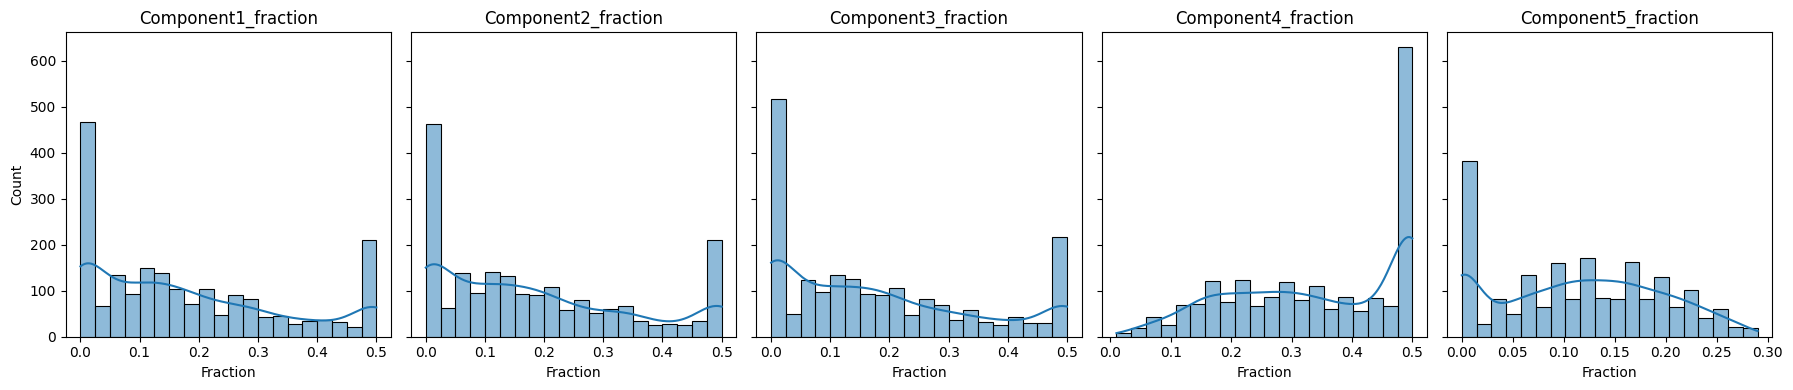

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(fraction_cols), figsize=(18, 4), sharey=True)
for i, col in enumerate(fraction_cols):
    sns.histplot(train_data[col], bins=20, ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('Fraction')
plt.tight_layout();

#### 2.2 Component Property Distribution

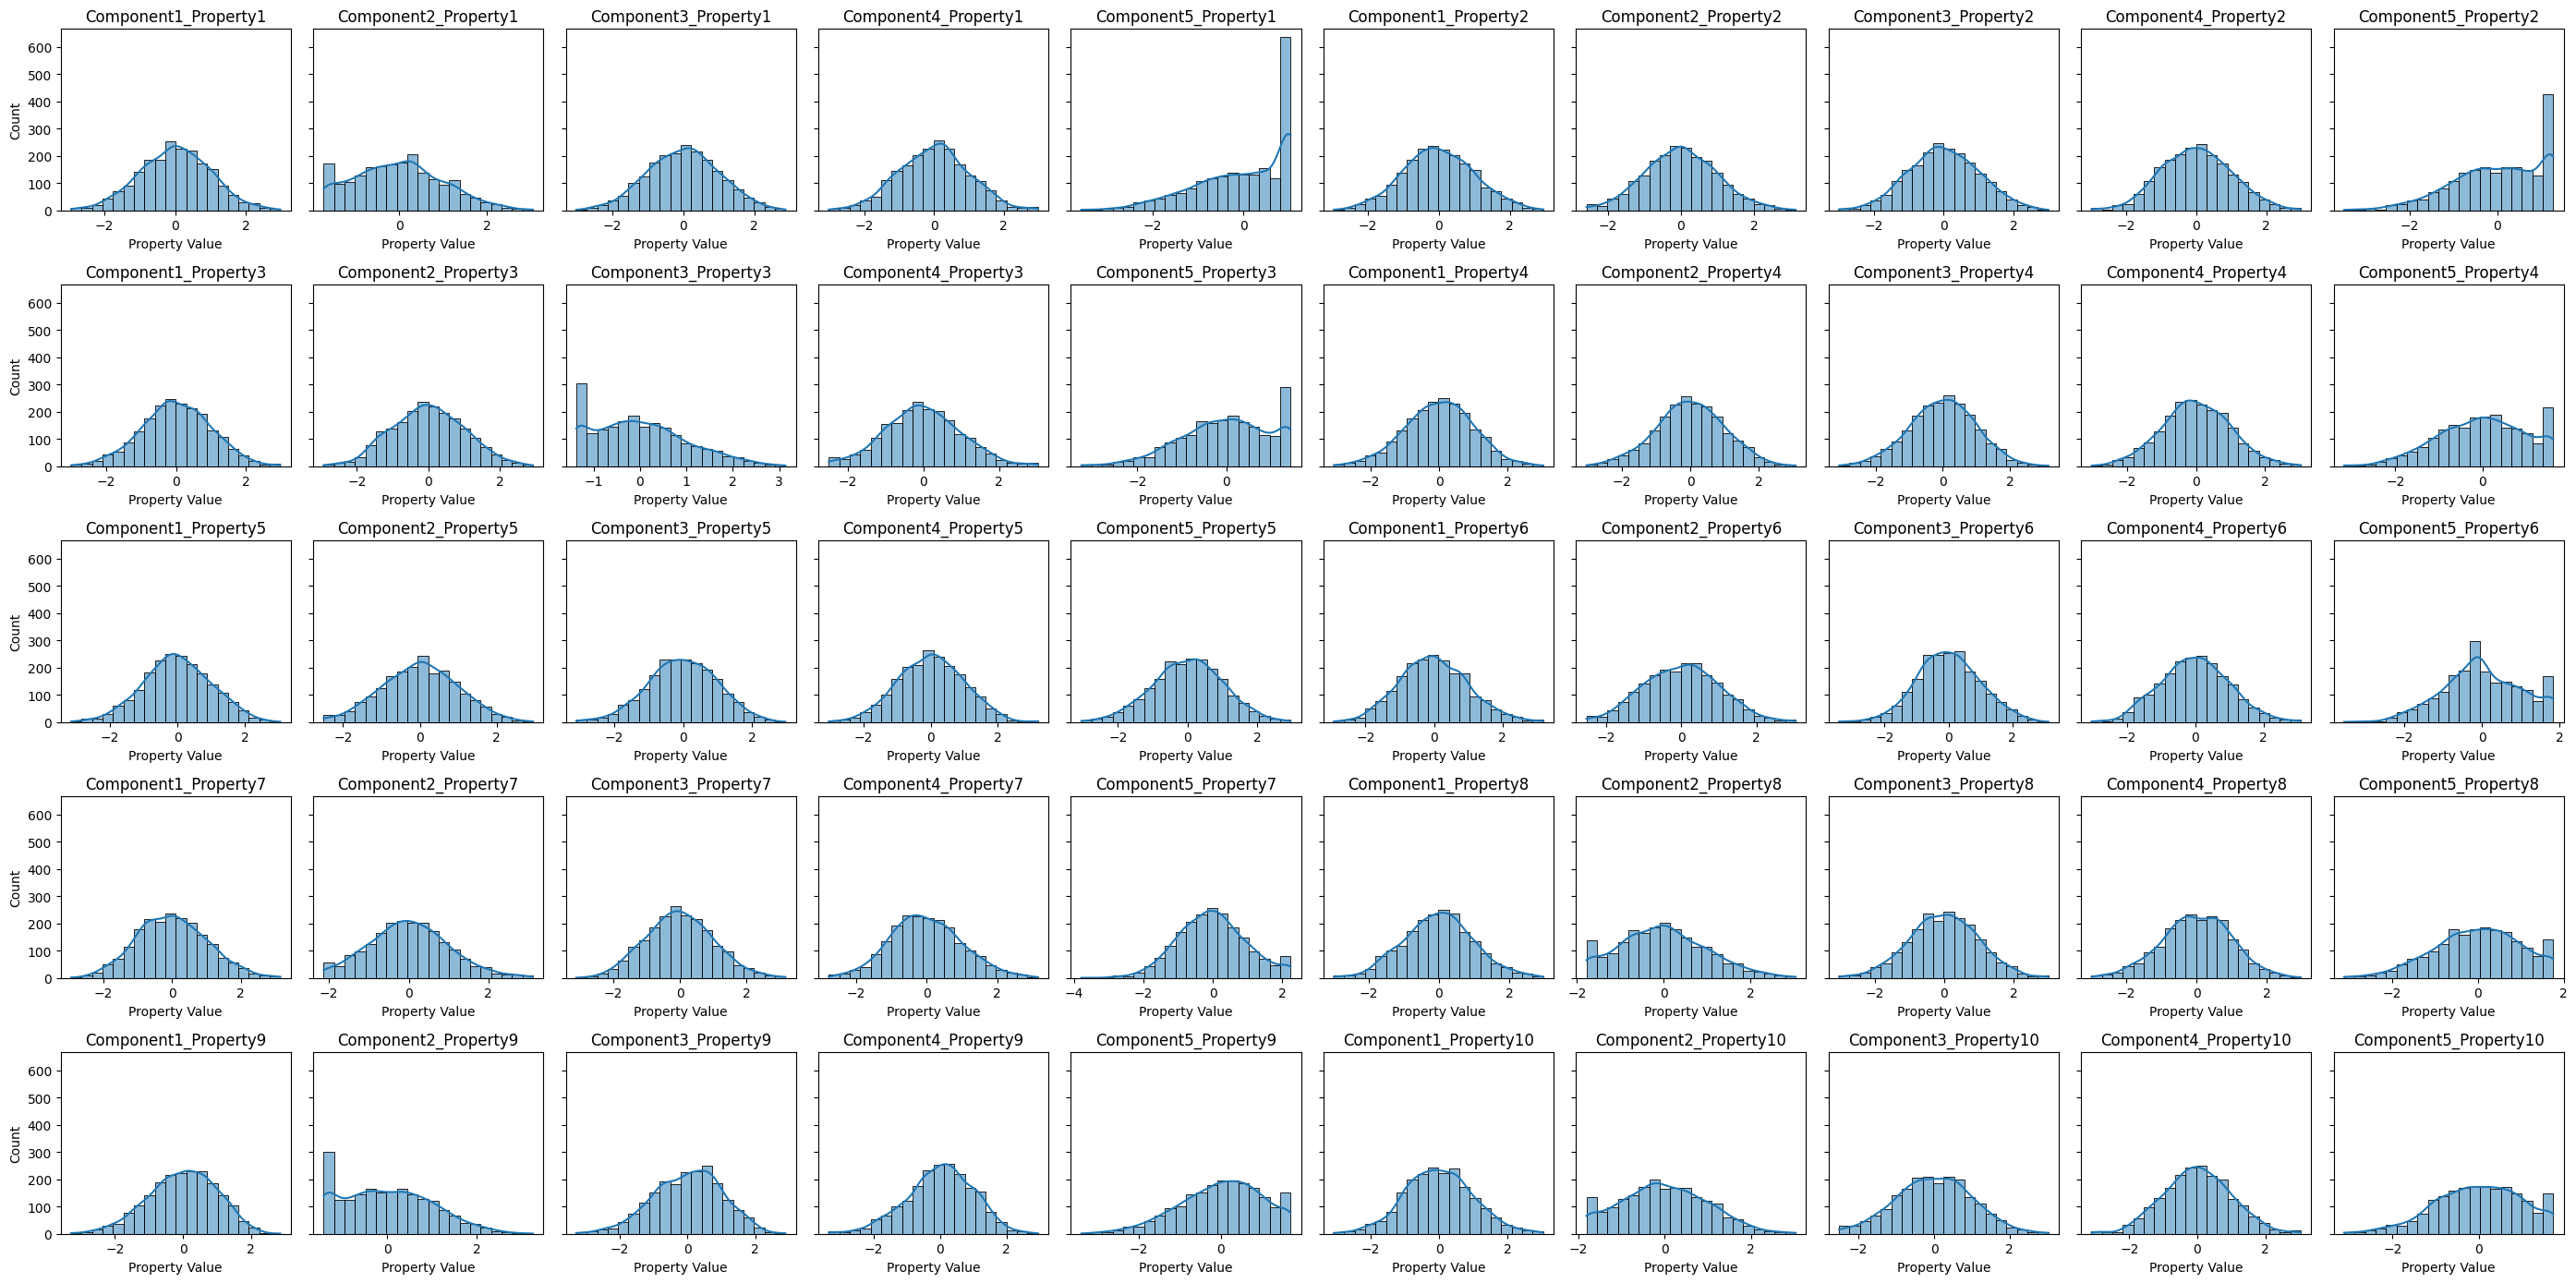

In [9]:
fig, axes = plt.subplots(5, 10, figsize=(28, 14), sharey=True)
axes = axes.flatten()
for i, col in enumerate(property_cols):
    sns.histplot(train_data[col], bins=20, ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('Property Value')
plt.tight_layout()

#### 2.3 Blend Property Distribution

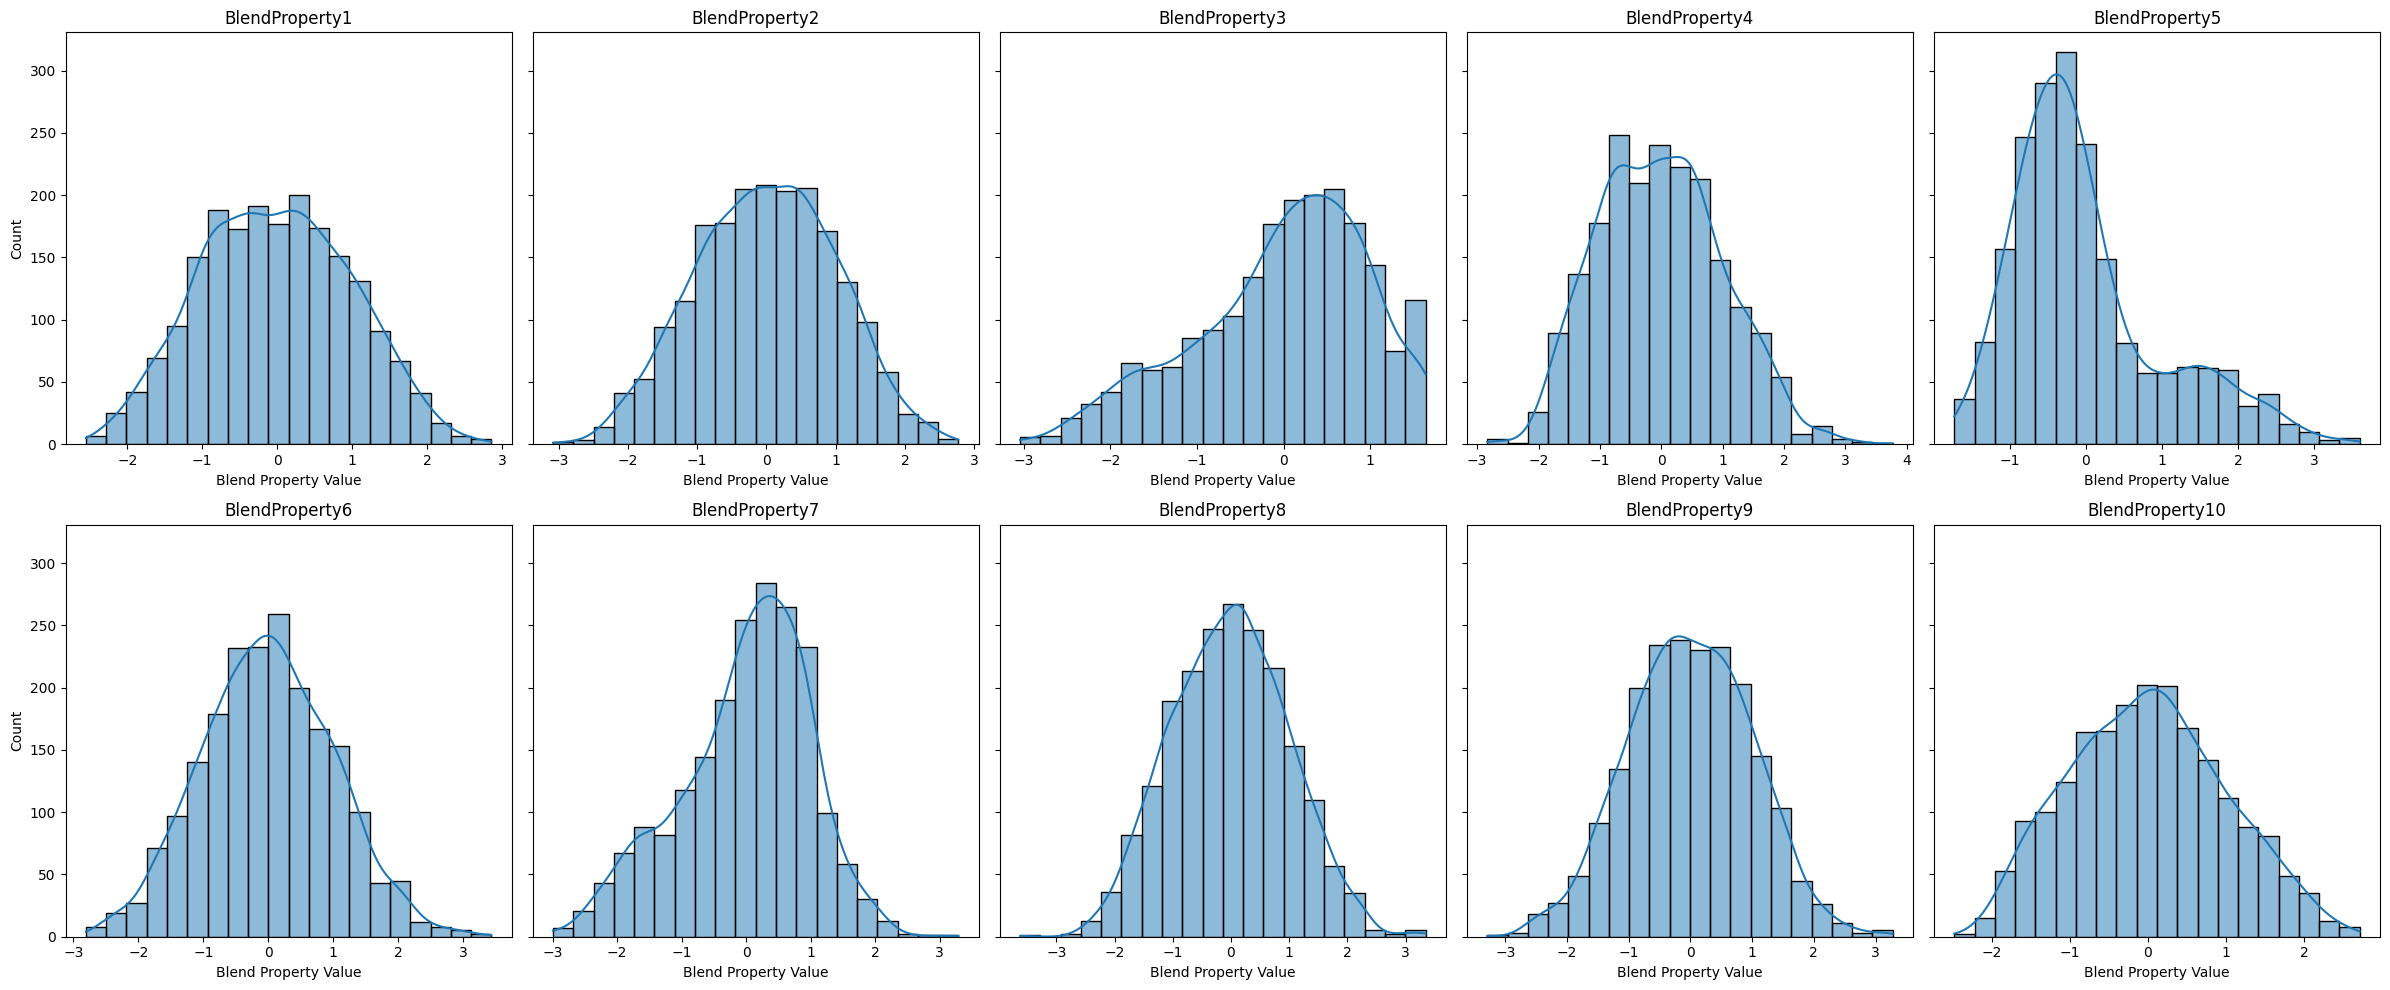

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(24, 10), sharey=True)
axes = axes.flatten()
for i, col in enumerate(blend_cols):
    sns.histplot(train_data[col], bins=20, ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('Blend Property Value')
plt.tight_layout();

### 3. Box Plots

#### 3.1 Component Fraction Boxplot

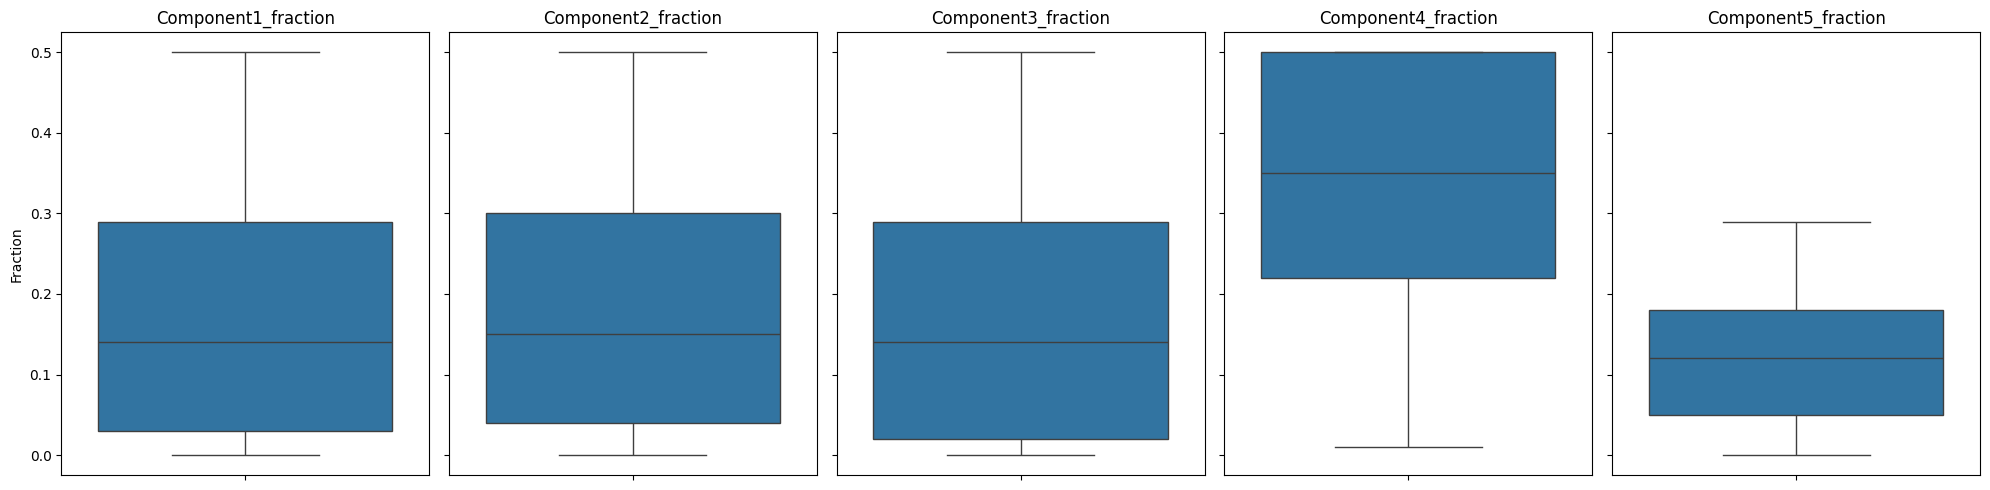

In [11]:
fig, axes = plt.subplots(1, len(fraction_cols), figsize=(20, 5), sharey=True)
for i, col in enumerate(fraction_cols):
    sns.boxplot(y=train_data[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Fraction')
    axes[i].set_xlabel('')
plt.tight_layout();

### 3.2 Component Property Boxplot

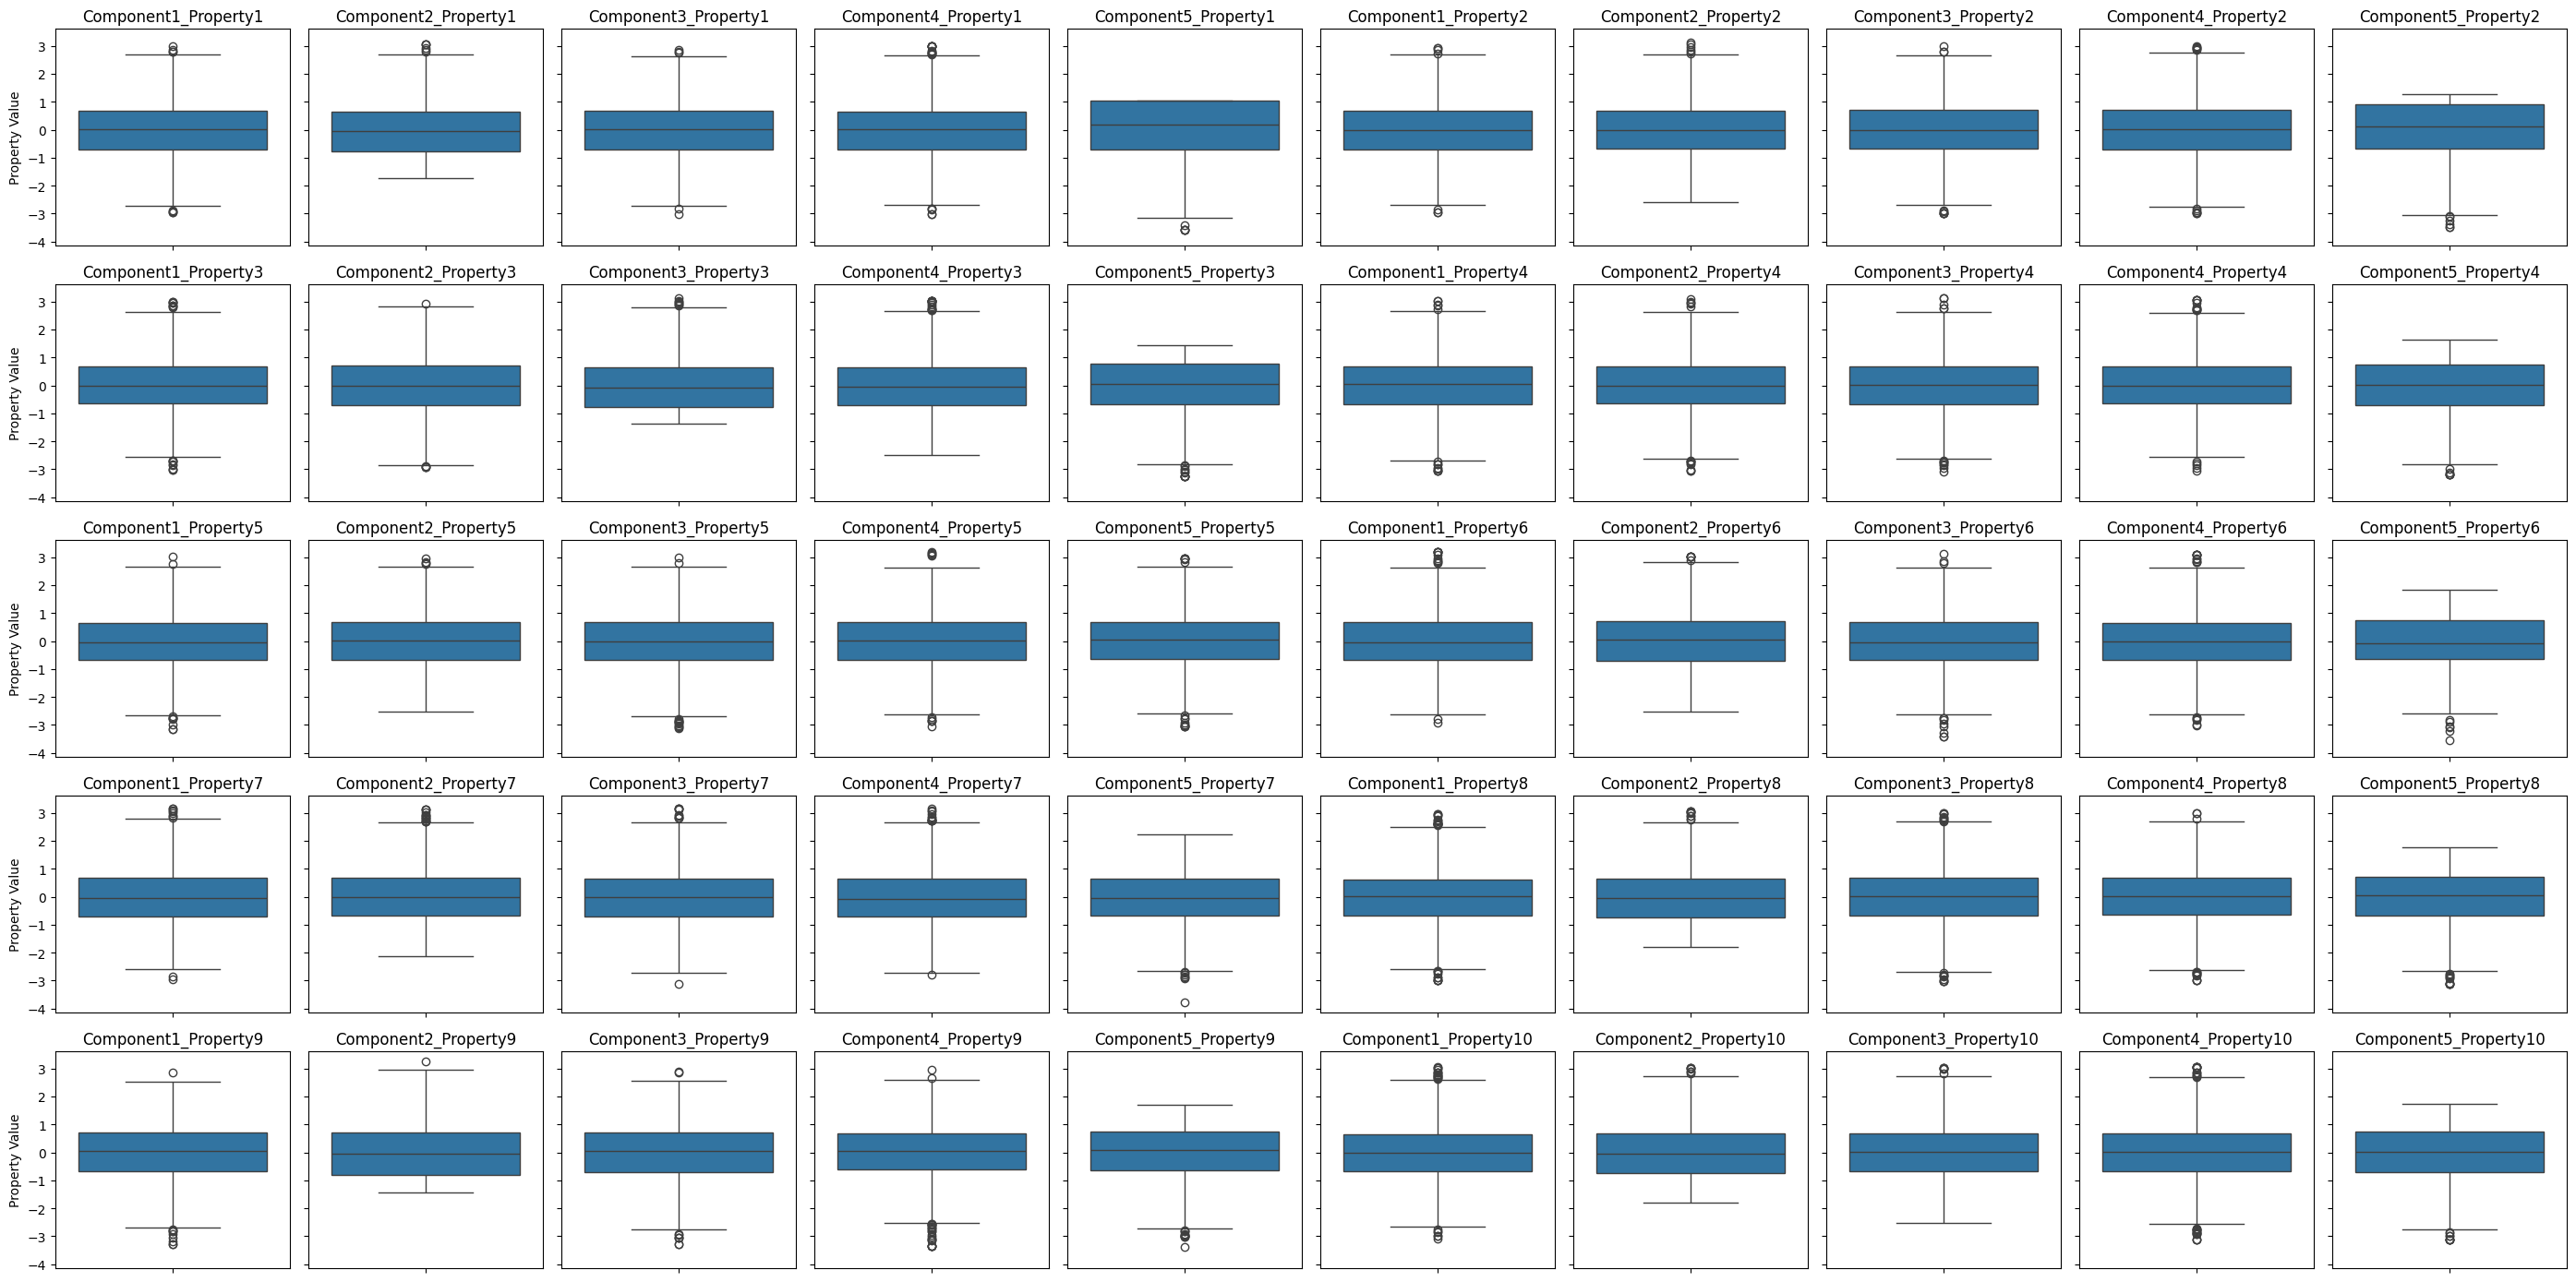

In [12]:
fig, axes = plt.subplots(5, 10, figsize=(28, 14), sharey=True)
axes = axes.flatten()
for i, col in enumerate(property_cols):
    sns.boxplot(y=train_data[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Property Value')
    axes[i].set_xlabel('')
plt.tight_layout();

#### 3.3 Blend Property Boxplot

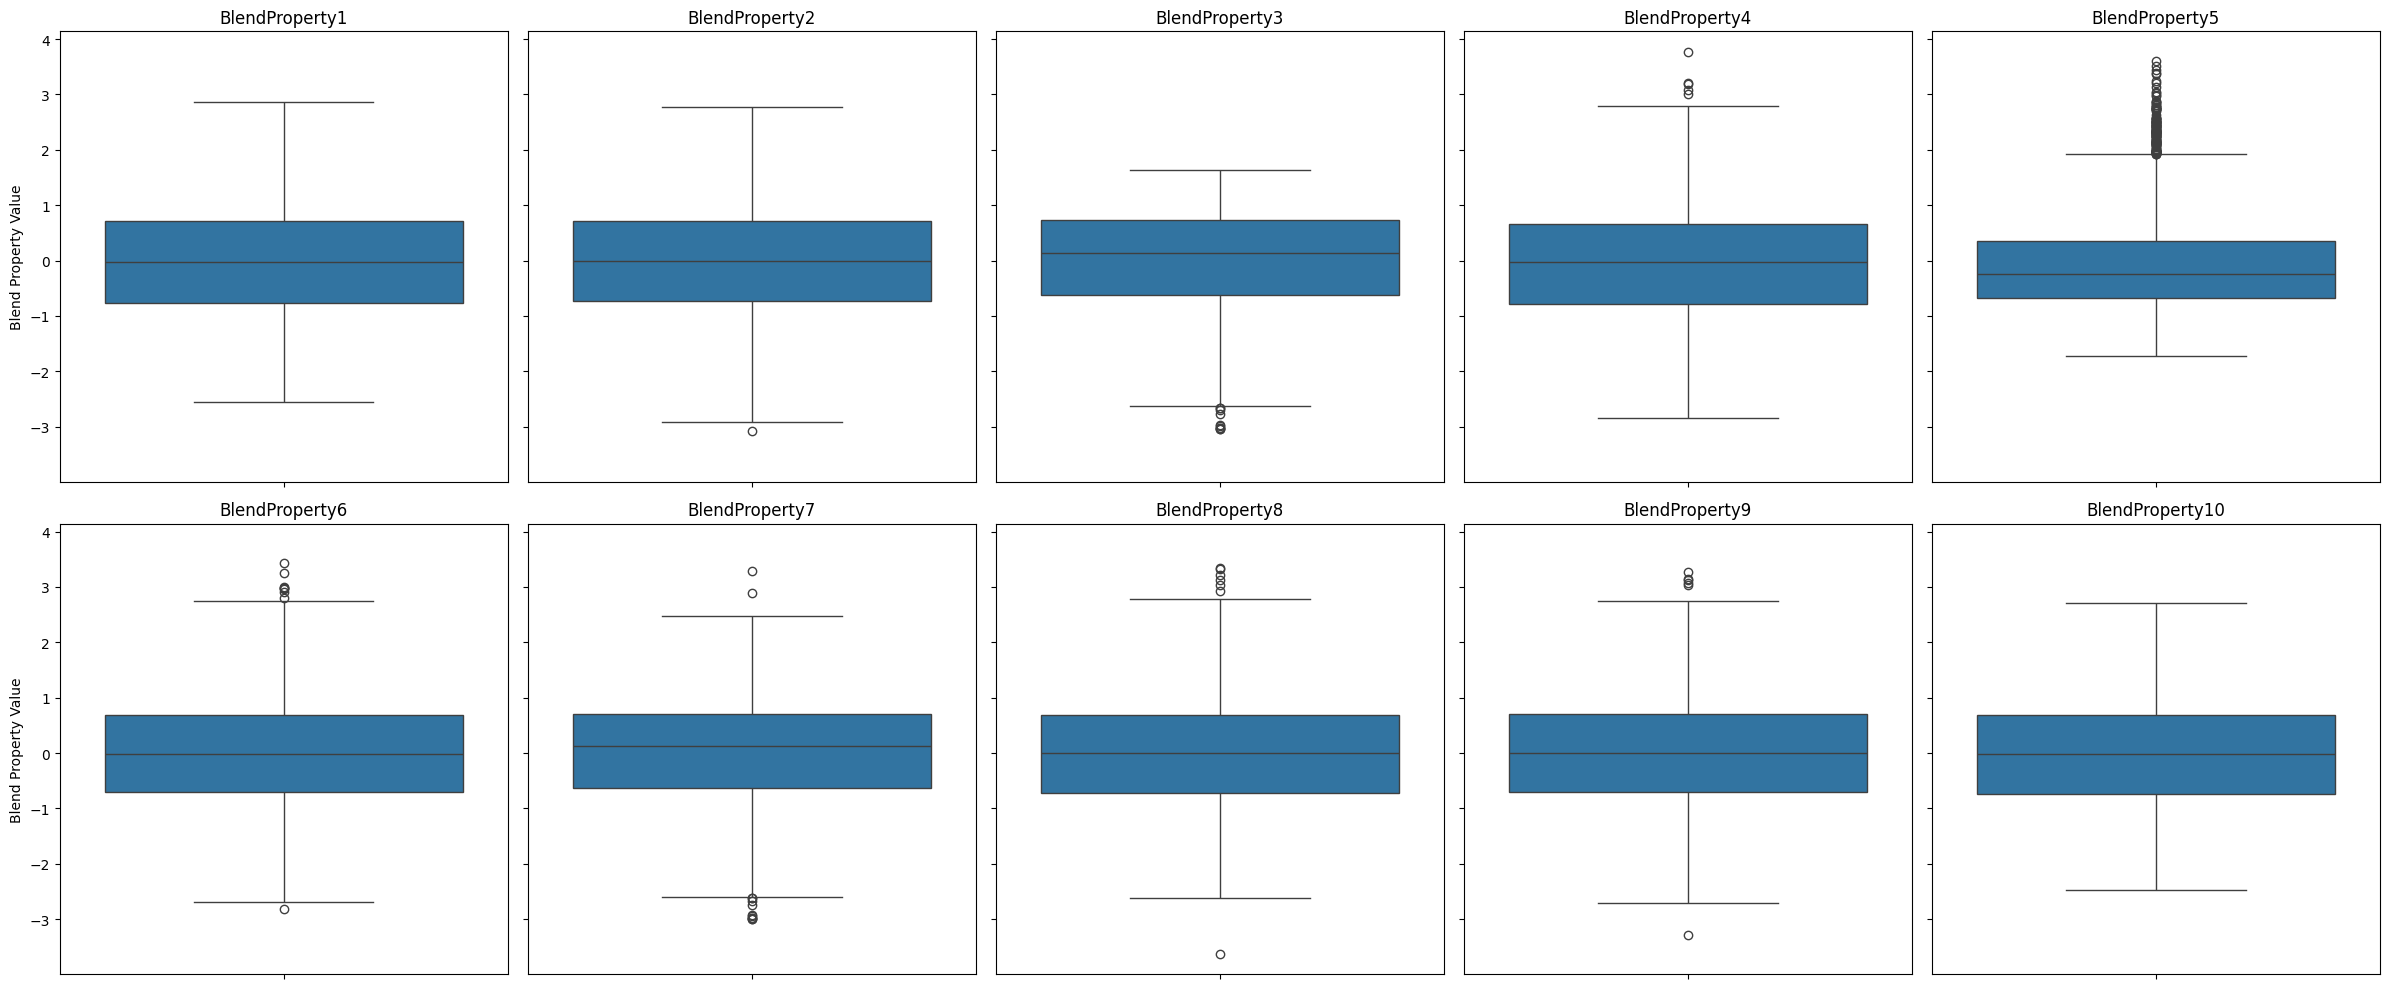

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(24, 10), sharey=True)
axes = axes.flatten()
for i, col in enumerate(blend_cols):
    sns.boxplot(y=train_data[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Blend Property Value')
    axes[i].set_xlabel('')
plt.tight_layout();

### 4. Correlation Heatmaps

#### 4.1 Component Fraction vs Blend Property

<Axes: >

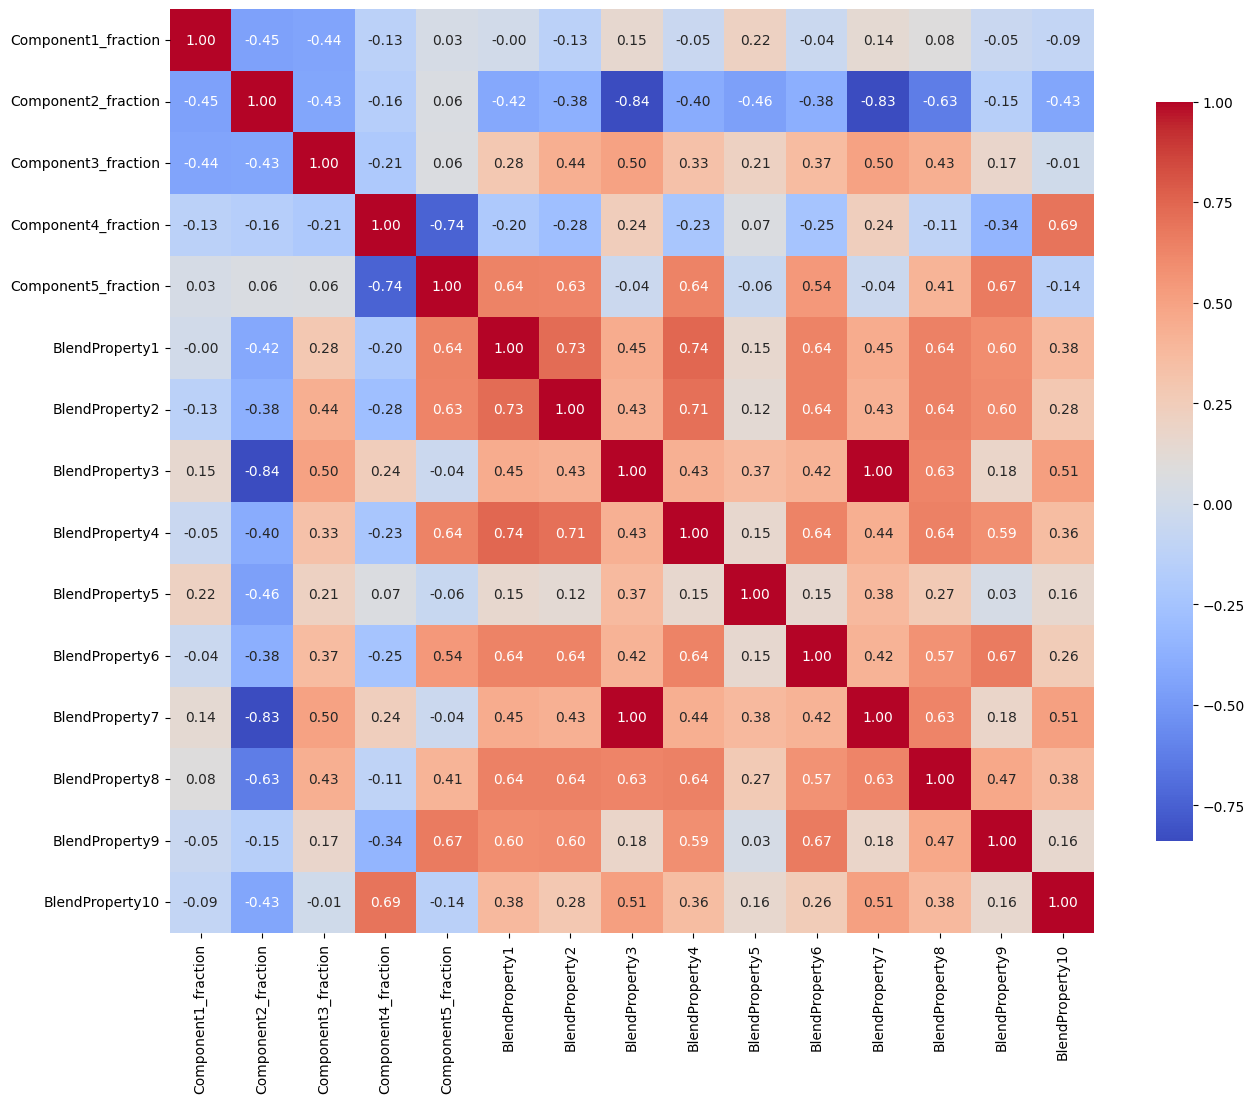

In [14]:
corr_matrix = train_data[fraction_cols + target_cols].corr()

fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax, square=True, cbar_kws={"shrink": .8})

In [15]:
# Identify highly correlated pairs of component fraction and blend properties
corr_pairs = []
for i in range(len(fraction_cols)):
    for j in range(i+1, len(blend_cols)):
        corr_val = corr_matrix.iloc[i, j + len(fraction_cols)]
        if abs(corr_val) > 0.5:
            corr_pairs.append((fraction_cols[i], blend_cols[j], corr_val))

if corr_pairs:
    print("Highly correlated component fraction and blend property pairs (|r| > 0.5):")
    for frac, blend, corr in corr_pairs:
        print(f"{frac} vs {blend}: {corr:.3f}")
else:
    print("No highly correlated component fraction and blend property pairs found.")

Highly correlated component fraction and blend property pairs (|r| > 0.5):
Component2_fraction vs BlendProperty3: -0.838
Component2_fraction vs BlendProperty7: -0.832
Component2_fraction vs BlendProperty8: -0.630
Component3_fraction vs BlendProperty7: 0.502
Component4_fraction vs BlendProperty10: 0.695
Component5_fraction vs BlendProperty6: 0.541
Component5_fraction vs BlendProperty9: 0.665


#### 4.2 Component Property Correlations

<Axes: >

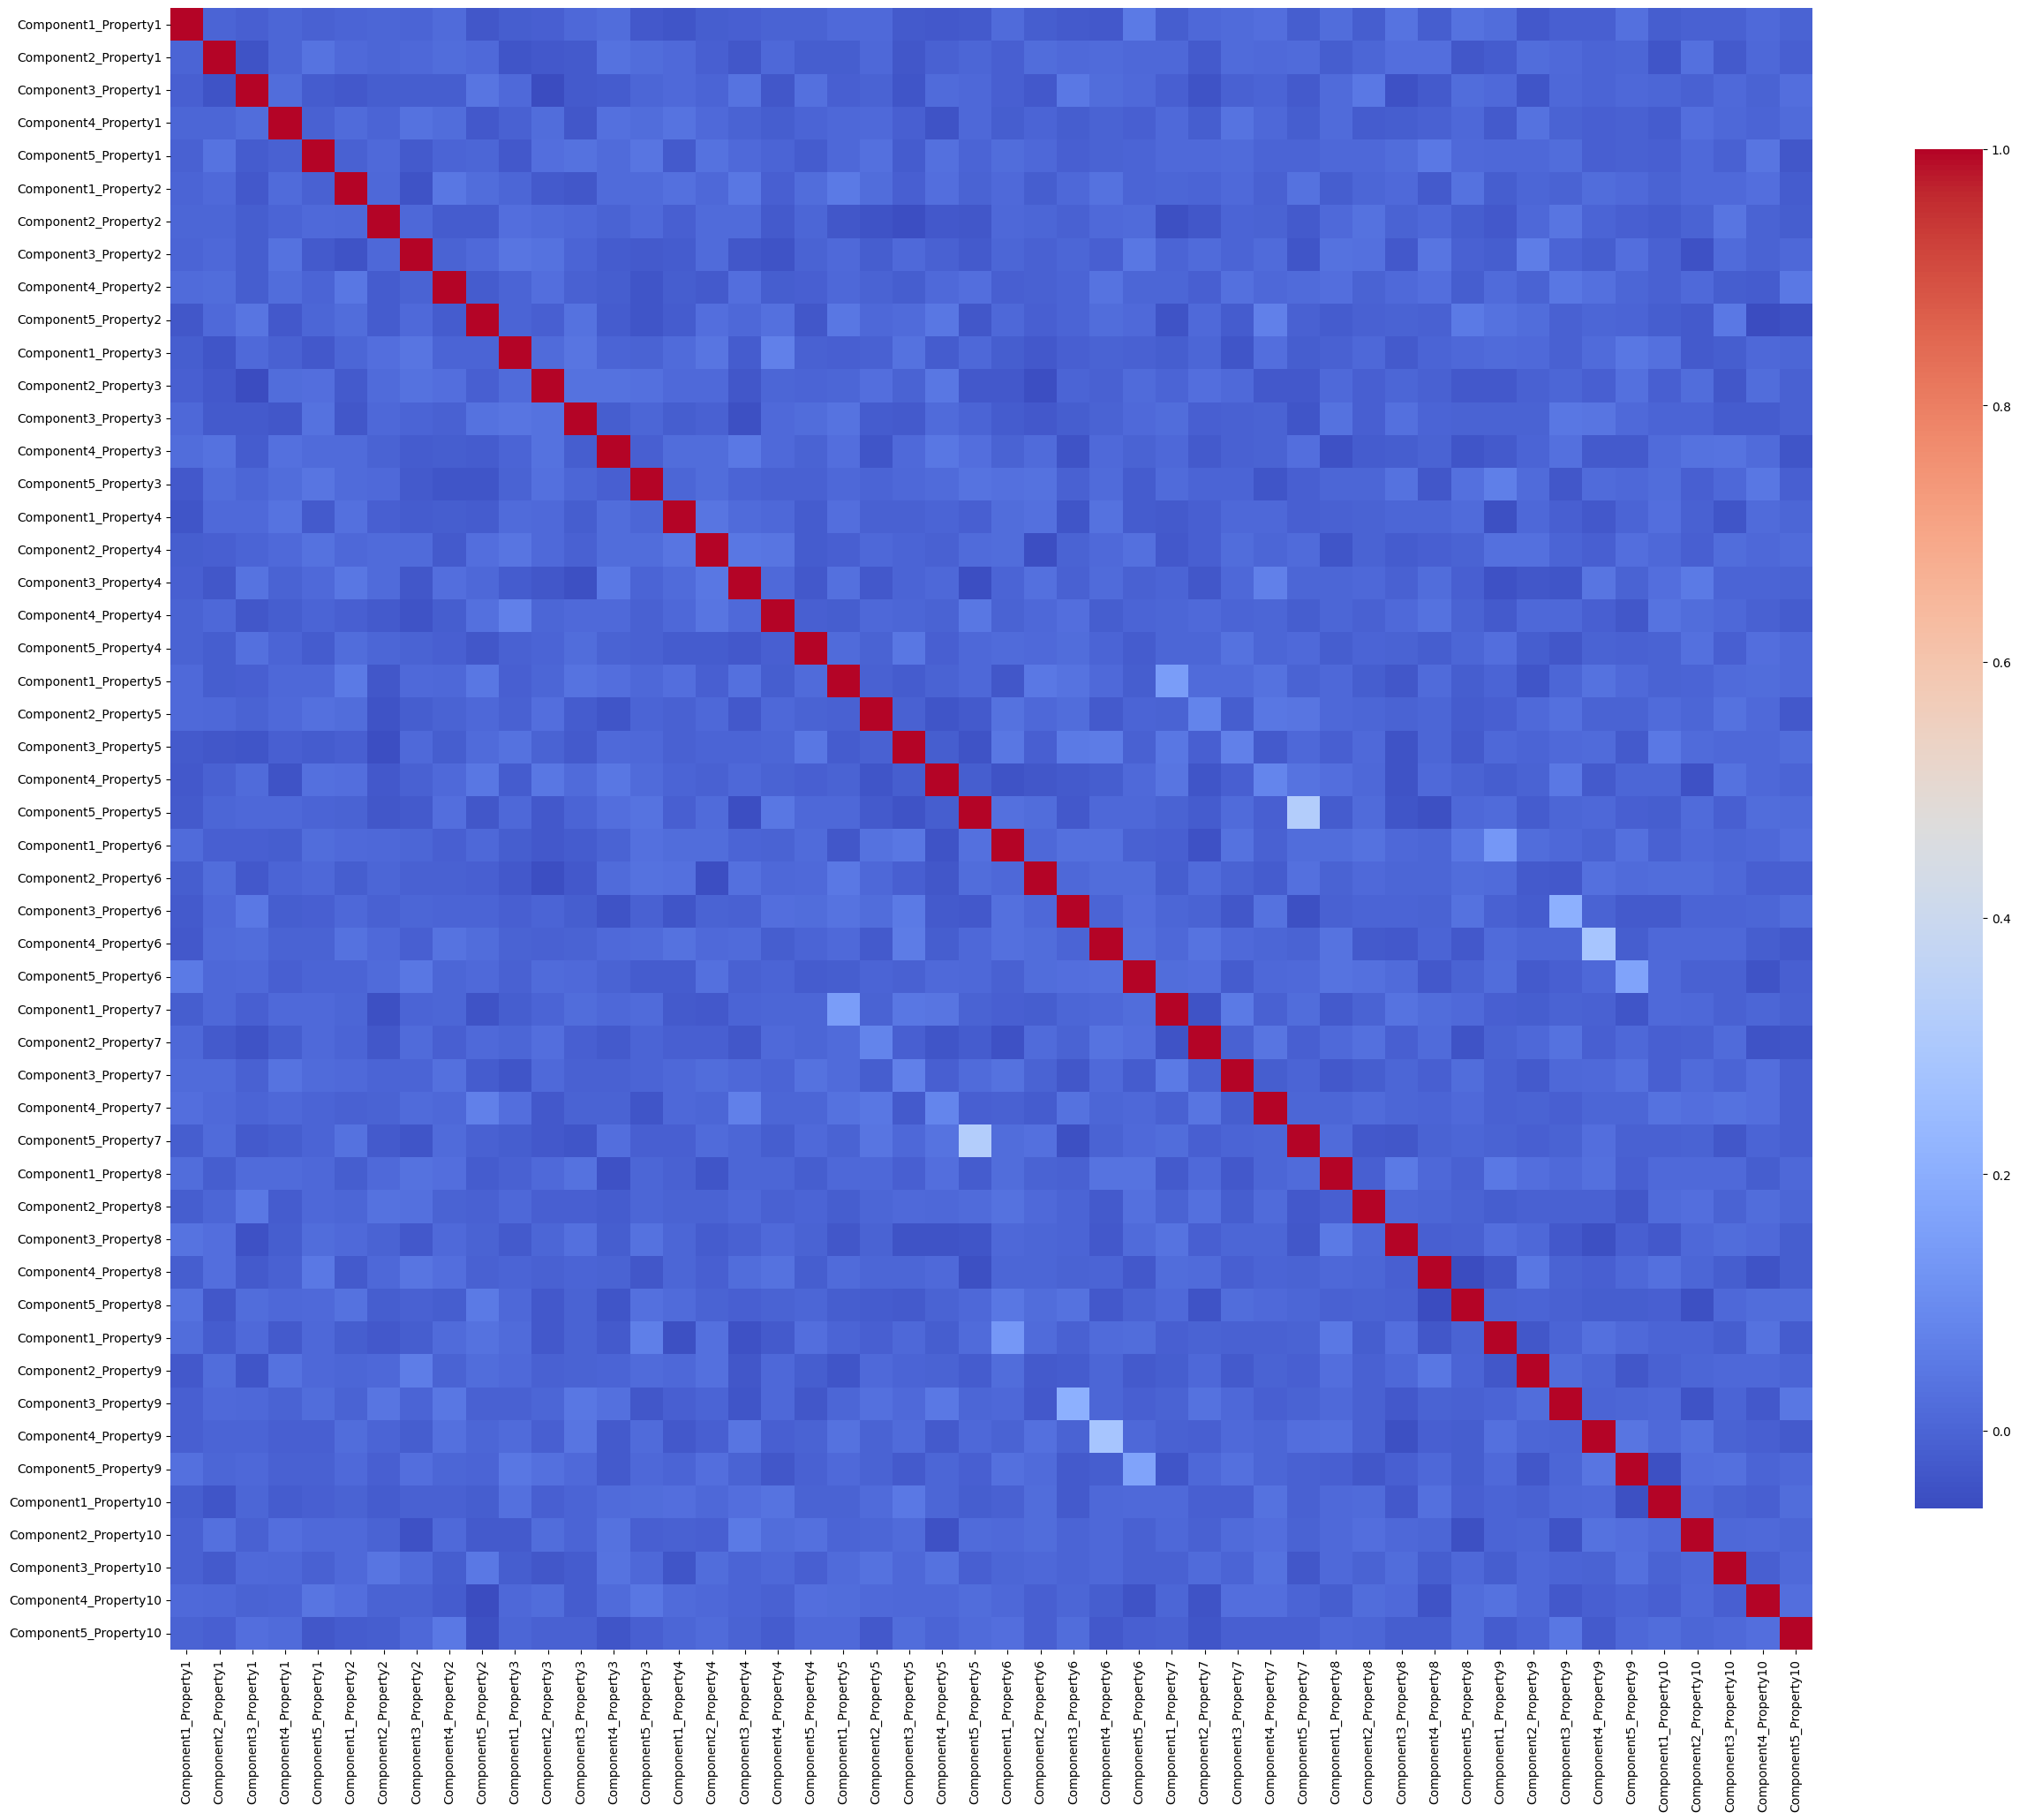

In [16]:
corr_matrix = train_data[property_cols].corr()

fig, ax = plt.subplots(figsize=(30, 25))
sns.heatmap(corr_matrix, cmap='coolwarm', ax=ax, square=True, cbar_kws={"shrink": .8})

## 5. Outlier Detection

In [17]:
# Detect outliers using IQR method
def detect_outliers_iqr(df: pd.DataFrame, columns: list) -> dict:
    """
    Detect outliers in the specified columns of a DataFrame using the IQR method.
    Parameters:
    - df: pd.DataFrame - The DataFrame containing the data.
    - columns: list - List of column names to check for outliers.
    Returns:
    - outlier_info: dict - A dictionary containing the count, percentage, and bounds of outliers for each column.
    """
    outlier_info = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if not outliers.empty:
            outlier_info[col] = {
                'count': len(outliers),
                'percentage': (len(outliers) / len(df)) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }

    return outlier_info

In [18]:
# Detect outliers in features (fractions and properties)
feature_outliers = detect_outliers_iqr(train_data, feature_cols)

# Detect outliers in target variables (blend properties)
target_outliers = detect_outliers_iqr(train_data, target_cols)

# Display summary of outliers in features
print("Feature Outliers Summary:")
for col, info in feature_outliers.items():
    print(f"{col}: {info['count']} outliers ({info['percentage']:.2f}%)")

print("\nTarget Outliers Summary:")
for col, info in target_outliers.items():
    print(f"{col}: {info['count']} outliers ({info['percentage']:.2f}%)")

# Count total rows with at least one outlier
feature_outlier_rows = train_data[
    train_data[feature_cols].apply(
        lambda x: (x < feature_outliers.get(x.name, {}).get('lower_bound', float('-inf'))) |
                 (x > feature_outliers.get(x.name, {}).get('upper_bound', float('inf'))),
        axis=0
    ).any(axis=1)
]

target_outlier_rows = train_data[
    train_data[target_cols].apply(
        lambda x: (x < target_outliers.get(x.name, {}).get('lower_bound', float('-inf'))) |
                 (x > target_outliers.get(x.name, {}).get('upper_bound', float('inf'))),
        axis=0
    ).any(axis=1)
]

print(f"\nTotal rows with at least one feature outlier: {len(feature_outlier_rows)} ({len(feature_outlier_rows)/len(train_data)*100:.2f}%)")
print(f"Total rows with at least one target outlier: {len(target_outlier_rows)} ({len(target_outlier_rows)/len(train_data)*100:.2f}%)")

Feature Outliers Summary:
Component1_Property1: 8 outliers (0.40%)
Component2_Property1: 6 outliers (0.30%)
Component3_Property1: 5 outliers (0.25%)
Component4_Property1: 18 outliers (0.90%)
Component5_Property1: 5 outliers (0.25%)
Component1_Property2: 7 outliers (0.35%)
Component2_Property2: 6 outliers (0.30%)
Component3_Property2: 9 outliers (0.45%)
Component4_Property2: 12 outliers (0.60%)
Component5_Property2: 6 outliers (0.30%)
Component1_Property3: 17 outliers (0.85%)
Component2_Property3: 5 outliers (0.25%)
Component3_Property3: 7 outliers (0.35%)
Component4_Property3: 15 outliers (0.75%)
Component5_Property3: 11 outliers (0.55%)
Component1_Property4: 13 outliers (0.65%)
Component2_Property4: 14 outliers (0.70%)
Component3_Property4: 13 outliers (0.65%)
Component4_Property4: 16 outliers (0.80%)
Component5_Property4: 6 outliers (0.30%)
Component1_Property5: 10 outliers (0.50%)
Component2_Property5: 4 outliers (0.20%)
Component3_Property5: 13 outliers (0.65%)
Component4_Property5